In [1]:
import numpy as np
import pandas as pd
import nltk
import spacy
import string 
import re
import os
import math
import codecs
from sklearn import feature_extraction
import glob

# Data Import


In [2]:
files = glob.glob('./studios/*.csv')
print(files)

['./studios/studio19.csv', './studios/studio18.csv', './studios/studio20.csv', './studios/studio21.csv', './studios/studio8.csv', './studios/studio9.csv', './studios/studio7.csv', './studios/studio6.csv', './studios/studio4.csv', './studios/studio5.csv', './studios/studio1.csv', './studios/studio2.csv', './studios/studio3.csv', './studios/studio10.csv', './studios/studio11.csv', './studios/studio13.csv', './studios/studio12.csv', './studios/studio16.csv', './studios/studio17.csv', './studios/studio15.csv', './studios/studio14.csv']


In [3]:
# All CSV in a dataframe

dfs = []

# iterate over dataframe; create list of dataframes; add studio column
for i,filename in enumerate(files):
    filenum = re.findall(r'\d+',str(filename))
    filenum = int(filenum[0])-1
    df = pd.read_csv(filename, index_col=None, header=0)
    df.insert(0,'studio',filenum)
    dfs.append(df)
    
# concatenate list of dataframes
frame = pd.concat(dfs, axis=0, ignore_index=True, sort=False)

In [4]:
frame.head(10)


,studio,id,title,description,instructions,author/id,image,history/created,history/modified,history/shared,...,stats/remixes,remix/parent,remix/root,Unnamed: 16,description (full),instruction (full),description (blank),instruction (blank),description.1,instructions.1
0,18,237042971,Steven and the Stevens [MV],Animation is hard! And time consuming! But aft...,Press the green flag to watch! (Inspired by St...,2745846,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-22T00:59:37.000Z,2018-07-23T09:27:01.000Z,2018-07-23T09:25:28.000Z,...,0,NaN,NaN,NaN,109.0,118.0,18.0,9.0,NaN,NaN
1,18,237100206,Grumpy Bubbles,"Big thanks to @jsh for his Day 1 project, Rive...","First, check out @jsh's River Waltz: https://s...",39526,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-23T00:25:41.000Z,2018-07-23T10:07:59.000Z,2018-07-23T10:07:59.000Z,...,0,235484400.0,235484400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,237093421,Raindrops,I've found that I don't always initially consi...,Press the green flag.,25705937,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-22T22:22:17.000Z,2018-07-23T13:33:50.000Z,2018-07-23T10:37:53.000Z,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18,237098671,Night Rain,After simulating rain drops for today's challe...,"Press the green flag, allow for the microphone...",25705937,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-23T00:06:28.000Z,2018-07-23T11:03:43.000Z,2018-07-23T10:38:58.000Z,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18,237111696,Lights,This project was created for Day 19 of Getting...,Enjoy the procession of the clones!,56239,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-23T03:16:00.000Z,2018-07-23T17:44:58.000Z,2018-07-23T10:59:22.000Z,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,18,62591162,Slim Cantore - Penquin Weather Channel Event,\n\n,This project is based on a Weather Story by We...,4615776,https://cdn2.scratch.mit.edu/get_image/project...,2015-05-16T05:27:51.000Z,2018-07-23T11:12:00.000Z,2015-05-21T00:13:38.000Z,...,0,24001065.0,24001065.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,18,237136651,Unstuck Day 19 Flowers,Three flowers on one stem is a variation from ...,Thanks for today's challenge! I have used clon...,14632339,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-23T10:50:19.000Z,2018-07-23T19:44:57.000Z,2018-07-23T11:04:11.000Z,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,18,237134693,Unstuck Day 19: Using Clones,I did this project for Getting Unstuck challen...,"Play with ripples! \nJust added sound, too.\nS...",214174,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-23T10:11:35.000Z,2018-07-23T12:17:09.000Z,2018-07-23T11:32:06.000Z,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,18,237138514,Day19,NaN,Click on the green flag to start,34225248,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-23T11:27:54.000Z,2018-07-23T11:38:35.000Z,2018-07-23T11:38:22.000Z,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,18,237138676,#019 Getting Unstuck Clones,I didn't have a lot of time to do this today.....,Move mouse around for clones...,20126730,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-23T11:31:36.000Z,2018-07-23T11:44:12.000Z,2018-07-23T11:41:27.000Z,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning


In [5]:
#drop the unnecessary columns
badColumns = ["stats/comments","stats/remixes","Unnamed: 16",
              "description (full)","instruction (full)","description (blank)",
              "instruction (blank)","description.1","instructions.1"]

for badColumn in badColumns:
    frame = frame.drop(badColumn,axis='columns')

In [6]:
# import all_studios CSV to get the author ID

dfAuthor = pd.read_csv('all_studios.csv', index_col=None, header=0)

In [7]:
# Look for the author username; add column to dataframe. 

dfAuthor = dfAuthor.rename(index=str, columns={"project_author_id": "author/id"})

dfAuthor.head()

frame = frame.rename(index=str, columns={"id": "project_id"})
frame.head()

merged_df = pd.merge(frame, dfAuthor, how = 'inner', on = ['project_id','author/id'])
merged_df = merged_df.drop("Unnamed: 12",axis='columns')

In [8]:
# Merge the two columns of stuff people wrote

merged_df["writing"] = merged_df["description"].map(str) + merged_df["instructions"]

In [9]:
# moving the columns I want to the front.

# get the list of columns
# cols = merged_df.columns.tolist()
# print(cols)

cols = ['studio', 'project_id', 'title', 'description', 'instructions', 'writing', 'author/id', 
        'project_author_username','image', 
        'history/created', 'history/modified', 'history/shared', 'stats/views', 'stats/loves', 
        'stats/favorites', 'remix/parent', 'remix/root', 'studio_numberscript_count', 
        'variable_count', 'list_count', 'comment_count', 'costume_count', 'sprite_count', 'block_count', 
        'block_unique_count', 'random_block_count']

merged_df = merged_df[cols]

merged_df.tail()

,studio,project_id,title,description,instructions,writing,author/id,project_author_username,image,history/created,...,remix/root,studio_numberscript_count,variable_count,list_count,comment_count,costume_count,sprite_count,block_count,block_unique_count,random_block_count
3758,13,237860907,Io trovo le lettere,Getting Unstuck 14\nCreare \nCreare un progett...,rispondi,Getting Unstuck 14\nCreare \nCreare un progett...,21462276,ratogi,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-31T13:37:38.000Z,...,NaN,14,2,0,0,0,4,1,19,12
3759,13,237999490,Getting Unstuck - Day 14,The challenge for day 14 is to create a projec...,Click the green arrow and enter your name when...,The challenge for day 14 is to create a projec...,24696341,GCarganilla,https://cdn2.scratch.mit.edu/get_image/project...,2018-08-01T22:09:01.000Z,...,NaN,14,2,0,1,0,6,1,21,13
3760,13,237792845,GETTING UNSTUCK14: FIGURES,NaN,"PRESS THE GREEN FLAG\nPLEASE, WRITE IN BLOCK L...","nanPRESS THE GREEN FLAG\nPLEASE, WRITE IN BLOC...",16573108,paolaernesta,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-30T20:32:00.000Z,...,NaN,14,23,4,0,0,11,6,77,22
3761,13,238433917,day 14,Create a project that uses the string blocks i...,NaN,NaN,24618980,danaespiliadi,https://cdn2.scratch.mit.edu/get_image/project...,2018-08-07T09:55:31.000Z,...,NaN,14,3,5,0,0,4,1,52,20
3762,13,238271691,Getting Unstuck - Day 14,"When I was younger, I would always create stag...",Press the green button and wait to hear instru...,"When I was younger, I would always create stag...",25334812,heyjessi,https://cdn2.scratch.mit.edu/get_image/project...,2018-08-05T12:55:06.000Z,...,NaN,14,1,4,0,0,3,1,42,11


In [10]:
# language detection
from langdetect import DetectorFactory
DetectorFactory.seed = 0 

# add a column of the language (highest probability of the language)
from langdetect import detect
merged_df["language"] = merged_df["writing"].apply(lambda x: detect(str(x)))

In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3763 entries, 0 to 3762
Data columns (total 27 columns):
studio                       3763 non-null int64
project_id                   3763 non-null int64
title                        3763 non-null object
description                  2954 non-null object
instructions                 3323 non-null object
writing                      3323 non-null object
author/id                    3763 non-null int64
project_author_username      3763 non-null object
image                        3763 non-null object
history/created              3763 non-null object
history/modified             3763 non-null object
history/shared               3763 non-null object
stats/views                  3763 non-null int64
stats/loves                  3763 non-null int64
stats/favorites              3763 non-null int64
remix/parent                 321 non-null float64
remix/root                   321 non-null float64
studio_numberscript_count    3763 non-null int64


# Stemming

In [361]:
# Select for English-only dataframe
# also ignores projects with no reflections
dfEng = merged_df[merged_df['language'] == 'en']
# dfEng.info()

merged_df['language'].value_counts()

merged_df['writing'].isnull().sum()

merged_df.head()


,studio,project_id,title,description,instructions,writing,author/id,project_author_username,image,history/created,...,studio_numberscript_count,variable_count,list_count,comment_count,costume_count,sprite_count,block_count,block_unique_count,random_block_count,language
0,18,237042971,Steven and the Stevens [MV],Animation is hard! And time consuming! But aft...,Press the green flag to watch! (Inspired by St...,Animation is hard! And time consuming! But aft...,2745846,paulinah,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-22T00:59:37.000Z,...,19,8,4,0,0,8,1,114,40,en
1,18,237100206,Grumpy Bubbles,"Big thanks to @jsh for his Day 1 project, Rive...","First, check out @jsh's River Waltz: https://s...","Big thanks to @jsh for his Day 1 project, Rive...",39526,karenb,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-23T00:25:41.000Z,...,19,4,10,1,6,2,1,99,40,en
2,18,237093421,Raindrops,I've found that I don't always initially consi...,Press the green flag.,I've found that I don't always initially consi...,25705937,alirb,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-22T22:22:17.000Z,...,19,4,2,0,0,9,2,39,23,en
3,18,237098671,Night Rain,After simulating rain drops for today's challe...,"Press the green flag, allow for the microphone...",After simulating rain drops for today's challe...,25705937,alirb,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-23T00:06:28.000Z,...,19,7,0,0,0,10,3,66,28,en
4,18,237111696,Lights,This project was created for Day 19 of Getting...,Enjoy the procession of the clones!,This project was created for Day 19 of Getting...,56239,jsh,https://cdn2.scratch.mit.edu/get_image/project...,2018-07-23T03:16:00.000Z,...,19,6,10,0,0,2,1,131,34,en


In [13]:
count = merged_df['writing'].str.split().str.len()
count = np.array(count)
# count.index = count.index.astype(str) + ' words:'
# count.sort_index(inplace=True)

print(count)

count = np.nan_to_num(count)

print("Mean word length:       ", count.mean())
print("Standard deviation:", count.std())
print("Minimum words:    ", count.min())
print("Maximum words:    ", count.max())

# count.index(749)

np.argmax(count)

merged_df.ix[1884]


[ 83.  93. 120. ...   9.  nan  57.]
Mean word length:        58.86234387456816
Standard deviation: 57.894808469858795
Minimum words:     0.0
Maximum words:     749.0


/Users/paulina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


studio                                                                       0
project_id                                                           235621375
title                                                          Unstuck - Day 1
description                  Thank you, Karen and Paulina for these Unstuck...
instructions                                         Click Green Flag to Start
writing                      Thank you, Karen and Paulina for these Unstuck...
author/id                                                              2456527
project_author_username                                                shad647
image                        https://cdn2.scratch.mit.edu/get_image/project...
history/created                                       2018-07-05T21:20:56.000Z
history/modified                                      2018-07-05T22:33:00.000Z
history/shared                                        2018-07-05T22:33:00.000Z
stats/views                                         

In [14]:
# tokenizing & stemming
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [259]:
texts = dfEng["writing"].dropna().tolist()
len(texts)

dfEng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3015 entries, 0 to 3762
Data columns (total 27 columns):
studio                       3015 non-null int64
project_id                   3015 non-null int64
title                        3015 non-null object
description                  2550 non-null object
instructions                 3015 non-null object
writing                      3015 non-null object
author/id                    3015 non-null int64
project_author_username      3015 non-null object
image                        3015 non-null object
history/created              3015 non-null object
history/modified             3015 non-null object
history/shared               3015 non-null object
stats/views                  3015 non-null int64
stats/loves                  3015 non-null int64
stats/favorites              3015 non-null int64
remix/parent                 271 non-null float64
remix/root                   271 non-null float64
studio_numberscript_count    3015 non-null int64


# TF-IDF v2


In [172]:
stopwords = nltk.corpus.stopwords.words('english') + list(string.punctuation)
# punctuation = list(string.punctuation)
RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
username_re = re.compile(r'@([A-Za-z0-9_]+)')
url_pattern = re.compile(r'((http|ftp|https):\/\/)?[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?')
scratch_words = ['green','click','start','flag', 'created','getting','scratch','projects','days','one',
                'sprite','blocks','block','use','\'s','https', 'project','clicks', 'whenever','flower','day']

def clean_list_of_documents(documents):
    
    cleaned_docs = []

    for i,doc in enumerate(documents):
        #lowercase
        words = doc.split()
        doc = ' '.join([word.lower() for word in words])
        # remove usernames (usernames and URLs HAVE to be removed before punctuation)
        doc = username_re.sub(r'', doc)
        # remove URLs 
        doc = url_pattern.sub(r'', doc)
        # replace return carriage with white space
        doc = doc.replace('\n', ' ')
         # remove punctuation
        for punc in punctuation: 
            doc = doc.replace(punc, ' ')
        # remove numbers
        for i in range(10):
            doc = doc.replace(str(i), ' ')
        # remove stop words
        for stop_word in stop_words:
            doc = doc.replace(' ' + stop_word + ' ', ' ')
         # remove scratch words
        for word in scratch_words: 
            doc = doc.replace(word, ' ')
        # remove single characters
        doc = [x for x in doc.split() if len(x) > 2]
        doc = " ".join(doc)
        # save the result to our list of documents
        cleaned_docs.append(doc)
        
    return cleaned_docs

def tokenize_and_stem(texts):
    stemmed_texts = []
    for i, doc in enumerate(texts):
        # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
        tokens = [word for sent in nltk.sent_tokenize(doc) for word in nltk.word_tokenize(sent)]
        filtered_tokens = []
        # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
        for token in tokens:
            if re.search('[a-zA-Z]', token):
                filtered_tokens.append(token)
        stems = [stemmer.stem(t) for t in filtered_tokens]
        stemmed_texts.append(stems)
    return stemmed_texts


def tokenize_only(text):
    token_texts = []
    for i, doc in enumerate(texts):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
        tokens = [word.lower() for sent in nltk.sent_tokenize(doc) for word in nltk.word_tokenize(sent)]
        filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
        for token in tokens:
            if re.search('[a-zA-Z]', token):
                filtered_tokens.append(token)
        token_texts.append(filtered_tokens)
    return token_texts

def clean_token_stem(texts, option):
    textsClean = clean_list_of_documents(texts)
    if option==1:
        textsClean = tokenize_and_stem(textsClean)
    else:
        textsClean = tokenize_only(textsClean)
    return textsClean

In [173]:
# tokenizing and stemming texts

# file,option: option 1 = tokenize & stem; 0 for tokenize only
cleanTexts = clean_token_stem(texts, 1)

# print(cleanTexts[:100])



In [174]:
# create a function that takes in a list of documents
# and returns a set of unique words. Make sure that you
# sort the list alphabetically before returning it. 

def get_vocabulary(docs):
    voc = []
    for doc in docs:
        for word in doc:
            if word not in voc: 
                voc.append(word)
    voc = list(set(voc))
    voc.sort()
    return voc

# Then print the length of your vocabulary
vocabulary = get_vocabulary(cleanTexts)
print(len(vocabulary))

# print(vocabulary)

6305


In [175]:
def docs_by_words_df(chunks, vocabulary):
    df = pd.DataFrame(0, index=np.arange(len(chunks)), columns=vocabulary)
    
    # fill out the matrix with counts
    for i,chunk in enumerate(chunks):
        for word in chunk:
            if word in df.columns: 
                df.loc[i,word] += 1
            
    return df

# call the function and check that the resulting dataframe is correct
dfVocab = docs_by_words_df(cleanTexts, vocabulary)

In [176]:
dfVocab.tail()

# dfVocab['click']

,aaaargh,aband,abandon,abbi,abelson,aber,aberjhani,abil,abilit,abl,...,—fred,—henri,—isaiah,—it,—jame,—martin,—milton,—neil,—what,▲how
3010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
def one_plus_log_mat(df):
    df = df.applymap(one_plus_log)
    return df

df_log = one_plus_log_mat(dfVocab)

# normalizer
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
df_log[df_log.columns] = scaler.fit_transform(df_log[df_log.columns])
# df_log[df_log.columns[500:600]]

In [178]:
# deviation vectors

def vector_length(u):
    return np.sqrt(np.dot(u, u))

def length_norm(u):
    return u / vector_length(u)

def transform_deviation_vectors(df):
    
    # get the numpy matrix from the df
    matrix = df.values
    
    # compute the sum of the vectors
    v_sum = np.sum(matrix, axis=0)
    
    # normalize this vector (find its average)
    v_avg = length_norm(v_sum)
    
    # we iterate through each vector
    for row in range(df_log.shape[0]):
        
        # this is one vector (row
        v_i = matrix[row,:]
        
        # we subtract its component along v_average
        scalar = np.dot(v_i,v_avg)
        sub = v_avg * scalar
        
        # we replace the row by the deviation vector
        matrix[row,:] = length_norm(v_i - sub)
    
    return df

df = transform_deviation_vectors(df_log)

In [179]:
df.head()

,aaaargh,aband,abandon,abbi,abelson,aber,aberjhani,abil,abilit,abl,...,—fred,—henri,—isaiah,—it,—jame,—martin,—milton,—neil,—what,▲how
0,-0.000044,-0.000231,-0.000199,-0.000612,-0.000056,-0.000045,-0.000053,-0.000718,-0.000040,-0.004909,...,-0.000066,-0.000037,-0.000112,-0.000041,-0.000088,-0.000100,-0.000080,-0.000091,-0.000691,-0.000040
1,-0.000023,-0.000121,-0.000104,-0.000322,-0.000030,-0.000024,-0.000028,-0.000378,-0.000021,-0.002581,...,-0.000035,-0.000019,-0.000059,-0.000021,-0.000046,-0.000053,-0.000042,-0.000048,-0.000363,-0.000021
2,-0.000047,-0.000248,-0.000213,-0.000657,-0.000060,-0.000048,-0.000057,-0.000771,-0.000042,-0.005273,...,-0.000071,-0.000040,-0.000120,-0.000044,-0.000094,-0.000108,-0.000086,-0.000098,-0.000742,-0.000043
3,-0.000026,-0.000134,-0.000115,-0.000354,-0.000033,-0.000026,-0.000031,-0.000416,-0.000023,-0.002844,...,-0.000038,-0.000021,-0.000065,-0.000024,-0.000051,-0.000058,-0.000046,-0.000053,-0.000400,-0.000023
4,-0.000048,-0.000250,-0.000215,-0.000663,-0.000061,-0.000049,-0.000058,-0.000778,-0.000043,-0.005322,...,-0.000072,-0.000040,-0.000121,-0.000044,-0.000095,-0.000109,-0.000087,-0.000099,-0.000749,-0.000043


# UGH clustering - take 2

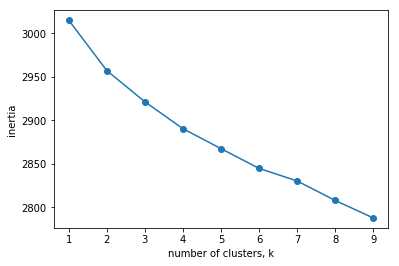

In [180]:
# 1a) create a list of inertia values for k 1-10
from sklearn.cluster import KMeans

ks = list(range(1, 10))
inertias = []

for k in ks:
    
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    
    # Fit model to samples
    kmeans.fit(df.values)
    
    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)
    
# 1b) plot the inertia values using matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

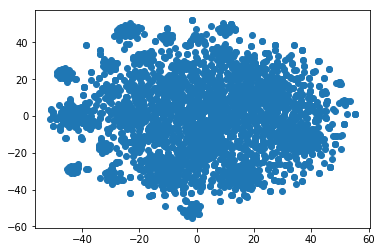

In [181]:
# 2a) plot the T-SNE graph using a learning rate of 200
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(df.values)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs,ys)
plt.show()

In [182]:
import collections
kmeans_obj = KMeans(n_clusters=10, max_iter=1000).fit(df.values)

n_words = 10
top_words = collections.defaultdict(lambda: [])

# iterate through each cluster
for n in range(kmeans_obj.n_clusters):

    print('CLUSTER ' + str(n+1) + ': ', end='')

    # get the cluster centers
    arr = kmeans_obj.cluster_centers_[n]

    # sorts the array and keep the last n words
    indices = arr.argsort()[-n_words:]

    # add the words to the list of words
    for i in indices:
        print(vocabulary[i], end=', ')
        top_words[n].append(vocabulary[i])
        
    print('')

CLUSTER 1: background, figur, variabl, timer, display, number, like, count, would, time, 
CLUSTER 2: bigger, appear, effect, smaller, clear, chang, key, bar, space, press, 
CLUSTER 3: fun, broadcast, nan, thank, learn, add, remix, three, thing, favorit, 
CLUSTER 4: help, way, nanpress, code, get, like, see, work, tri, make, 
CLUSTER 5: prompt, certain, two, exc, collid, this, say, challeng, creat, unstuck, 
CLUSTER 6: background, around, categori, involv, ball, sens, differ, chang, touch, color, 
CLUSTER 7: catch, fli, cat, game, jump, left, right, move, key, arrow, 
CLUSTER 8: categori, beat, song, explor, piano, sound, instrument, music, note, play, 
CLUSTER 9: enjoy, watch, move, two, happen, screen, instruct, stage, see, nan, 
CLUSTER 10: someth, type, word, creat, item, program, list, ask, answer, question, 


In [183]:
# 6a) Use the code above to apply the NMF model
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[df.columns] = scaler.fit_transform(df[df.columns])

# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(df.values)

# Transform the articles: nmf_features
nmf_features = model.transform(df.values)

# Print the NMF features
print(nmf_features)

[[0.09793783 0.01699765 0.06073409 0.0863122  0.05144715 0.06572868]
 [0.09182701 0.03760575 0.07554079 0.02393617 0.07418352 0.04289196]
 [0.16844849 0.03204286 0.         0.0018978  0.05946108 0.00870889]
 ...
 [0.09884063 0.0448177  0.03439945 0.01939075 0.07386117 0.05280408]
 [0.00596373 0.02877498 0.07120387 0.         0.05885935 0.3125843 ]
 [0.1024617  0.02703039 0.02494022 0.01284639 0.05474488 0.12697991]]


In [184]:
# 6b) print the top ten words of each component
import pandas as pd

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=df.columns)

for i in range(6):

    # Select row 3: component
    component = components_df.iloc[i,:]

    # Print result of nlargest
    print(component.nlargest(n=10), '\n')

time       1.528969
would      1.373066
work       1.026235
like       0.919976
way        0.877922
think      0.826383
tri        0.821164
also       0.814324
code       0.794541
thought    0.740735
Name: 0, dtype: float64 

arrow    1.907587
right    1.747261
left     1.608430
move     1.196643
key      1.152002
game     0.985651
cat      0.696286
jump     0.608218
space    0.476217
point    0.433371
Name: 1, dtype: float64 

thing        1.630940
three        1.530399
learn        1.436862
favorit      1.345556
remix        1.223365
add          0.851373
nan          0.437309
thank        0.389203
broadcast    0.303227
unstuck      0.261400
Name: 2, dtype: float64 

certain    1.561995
two        1.422870
say        1.345218
exc        1.270989
collid     1.219429
creat      0.863195
unstuck    0.480383
number     0.398829
count      0.362062
variabl    0.349059
Name: 3, dtype: float64 

chang     1.858815
press     1.406443
color     1.093045
space     0.987092
bar       0.743668
k

In [193]:
authorReflections = dfEng['project_author_username'].value_counts()

print(authorReflections)

print("The number of English-writing authors is",len(authorReflections))

Curious_AEF               29
scratchteacheralpha032    28
HeloisaZal                26
PinkGoldPeachyKeen        26
KPSRm27                   26
alirb                     25
rbotero                   25
gerulm                    25
techteech                 24
jakel181                  24
IT_Lady                   23
AnitaVaca                 23
RoboSquid                 23
Nanoks                    23
chrise07                  23
CMSSowders                23
jamesdotca                22
aitan                     22
mstone326                 22
karenb                    22
nbblasko                  22
MrQuentin                 22
mccormba                  22
welfringer                22
enauman                   22
MadameFrancaise           22
Marharold                 22
jennykostka               22
ekontopidi                21
CompTeacherK5             21
                          ..
sabri71                    1
nthorgren                  1
bookbird                   1
HDStech2016   

# keywords
based off this paper: https://dl-acm-org.ezp-prod1.hul.harvard.edu/citation.cfm?id=3027394

In [215]:
# reflection = ['i','me']
# experience = ['i','me','we','was','had','were','did']
# feeling = ['i','me','feel','felt']
# belief = ['i','my','it','feel','believe','think','have']
# difficulty = ['because','but','if','although','lack','problems','situation',
#               'difficult','due','wrong','trying','felt','made',
#               'did','didn\'t','don\'t','have','could','would',
#                'may','still','not','however','it']
# perspective = ['they','she','his','felt','said','understand',
#                'may','might','would','aware','that']
# learning = ['me','I','future','experience','learnt','have','better']


reflectiveTypes = {}

# reflectiveTypes = {"reflection":['i','me'],
#     "experience":['we','was','had','were','did'],
#     "feeling":['feel','felt'],
#     "belief": ['my','it','feel','believe','think','have'],
#     "difficulty": ['because','but','if','although','lack','problems','situation',
#               'difficult','due','wrong','trying','felt','made',
#               'did','didn\'t','don\'t','have','could','would',
#                'may','still','not','however','it'],
#     "perspective": ['they','she','his','felt','said','understand',
#                'may','might','would','aware','that'],
#     "learning": ['future','experience','learnt','have','better']
# }

reflectiveTypes = {"reflection":['i','me'],
    "experience":['i','me','we','was','had','were','did'],
    "feeling":['i','me','feel','felt'],
    "belief": ['i','my','it','feel','believe','think','have'],
    "difficulty": ['because','but','if','although','lack','problems','situation',
              'difficult','due','wrong','trying','felt','made',
              'did','didn\'t','don\'t','have','could','would',
               'may','still','not','however','it'],
    "perspective": ['they','she','his','felt','said','understand',
               'may','might','would','aware','that'],
    "learning": ['me','I','future','experience','learnt','have','better'],
    "username": ['username']
}


print(reflectiveTypes)
               
               

{'reflection': ['i', 'me'], 'experience': ['i', 'me', 'we', 'was', 'had', 'were', 'did'], 'feeling': ['i', 'me', 'feel', 'felt'], 'belief': ['i', 'my', 'it', 'feel', 'believe', 'think', 'have'], 'difficulty': ['because', 'but', 'if', 'although', 'lack', 'problems', 'situation', 'difficult', 'due', 'wrong', 'trying', 'felt', 'made', 'did', "didn't", "don't", 'have', 'could', 'would', 'may', 'still', 'not', 'however', 'it'], 'perspective': ['they', 'she', 'his', 'felt', 'said', 'understand', 'may', 'might', 'would', 'aware', 'that'], 'learning': ['me', 'I', 'future', 'experience', 'learnt', 'have', 'better'], 'username': ['username']}


In [216]:
# build a dataframe where the first column is the writing and there's a column for each of the categories?


In [217]:
# dfReflection.head()

In [330]:
colsReflection = ['writing','reflection','experience','feeling','belief','difficulty','perspective','learning','username']
dfReflection = pd.DataFrame()
dfReflection = dfReflection.reindex(columns = colsReflection)

In [331]:
punctuation = list(string.punctuation)
RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
username_re = re.compile(r'@([A-Za-z0-9_]+)')
url_pattern = re.compile(r'((http|ftp|https):\/\/)?[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?')

def clean_documents(documents):
    
    cleaned_docs = []

    for i,doc in enumerate(documents):
        #lowercase
        words = doc.split()
        doc = ' '.join([word.lower() for word in words])
        # remove usernames (usernames and URLs HAVE to be removed before punctuation)
        doc = username_re.sub(r'username', doc)
        # remove URLs 
        doc = url_pattern.sub(r'url', doc)
        # replace return carriage with white space
        doc = doc.replace('\n', ' ')
         # remove punctuation
        for punc in punctuation: 
            doc = doc.replace(punc, ' ')
        # remove numbers
        for i in range(10):
            doc = doc.replace(str(i), ' ')
        # save the result to our list of documents
        cleaned_docs.append(doc)
        
    return cleaned_docs

writingTexts = dfEng['writing'].tolist()

writingTexts = clean_documents(writingTexts)

# print(writingTexts[:100])

dfReflection['studio'] = dfEng['studio']
dfReflection['writing'] = writingTexts

In [332]:
# dfReflection.info()

# dfReflection['studio'] = dfEng['studio']

dfReflection.info()

# dfEng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3015 entries, 0 to 3762
Data columns (total 10 columns):
writing        3015 non-null object
reflection     0 non-null float64
experience     0 non-null float64
feeling        0 non-null float64
belief         0 non-null float64
difficulty     0 non-null float64
perspective    0 non-null float64
learning       0 non-null float64
username       0 non-null float64
studio         3015 non-null int64
dtypes: float64(8), int64(1), object(1)
memory usage: 259.1+ KB


In [334]:
# colsReflectiveTypes = [reflection,experience,feeling,belief,difficulty,
#                        perspective,learning,username]

def reflectiveMatrix(df, col): 
    for i, row in df.iterrows():
        reflectString = row[col]
        for reflectiveType, reflectiveList in reflectiveTypes.items():
            count = 0
            for reflectW in reflectiveList:
                count += sum(1 for _ in re.finditer(r'\b%s\b' % re.escape(reflectW), reflectString))
                df.at[i,reflectiveType] = count
    return df
        
dfReflectiveMatrix = reflectiveMatrix(dfReflection,'writing')


    


In [335]:
dfReflectiveMatrix.head()

# type(dfReflectiveMatrix) 

,writing,reflection,experience,feeling,belief,difficulty,perspective,learning,username,studio
0,animation is hard and time consuming but aft...,3.0,4.0,4.0,3.0,7.0,4.0,0.0,1.0,18
1,big thanks to username for his day project ...,1.0,2.0,1.0,2.0,1.0,4.0,0.0,2.0,18
2,i ve found that i don t always initially consi...,11.0,11.0,11.0,14.0,3.0,2.0,0.0,0.0,18
3,after simulating rain drops for today s challe...,5.0,7.0,6.0,8.0,0.0,1.0,0.0,0.0,18
4,this project was created for day of getting...,5.0,11.0,5.0,4.0,3.0,0.0,1.0,0.0,18


In [336]:
dfReflectiveMatrix['difficulty'].value_counts()



0.0     966
1.0     490
2.0     366
3.0     273
4.0     231
5.0     169
6.0     120
7.0     100
8.0      86
9.0      56
10.0     54
11.0     29
12.0     20
13.0     15
14.0      9
16.0      9
15.0      6
29.0      5
21.0      3
17.0      2
18.0      2
19.0      1
36.0      1
40.0      1
26.0      1
Name: difficulty, dtype: int64

In [279]:
dfReflectiveMatrix.loc[dfReflectiveMatrix['difficulty'] >= 1]

,writing,reflection,experience,feeling,belief,difficulty,perspective,learning,username,studio
0,animation is hard and time consuming but aft...,3.0,4.0,4.0,3.0,7.0,4.0,0.0,1.0,18
1,big thanks to username for his day project ...,1.0,2.0,1.0,2.0,1.0,4.0,0.0,2.0,18
2,i ve found that i don t always initially consi...,11.0,11.0,11.0,14.0,3.0,2.0,0.0,0.0,18
4,this project was created for day of getting...,5.0,11.0,5.0,4.0,3.0,0.0,1.0,0.0,18
6,three flowers on one stem is a variation from ...,3.0,3.0,3.0,6.0,4.0,0.0,1.0,0.0,18
7,i did this project for getting unstuck challen...,5.0,8.0,5.0,10.0,16.0,2.0,1.0,1.0,18
9,i didn t have a lot of time to do this today ...,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,18
10,i am stuck today this code works sometimes an...,3.0,3.0,3.0,6.0,4.0,0.0,0.0,0.0,18
11,this is a sketch for a maker game i drew two...,6.0,8.0,7.0,10.0,6.0,0.0,2.0,0.0,18
12,i played with fireworks on day url and thoug...,11.0,14.0,11.0,13.0,6.0,3.0,1.0,3.0,18


In [280]:
dfReflection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3015 entries, 0 to 3762
Data columns (total 10 columns):
writing        3015 non-null object
reflection     3015 non-null float64
experience     3015 non-null float64
feeling        3015 non-null float64
belief         3015 non-null float64
difficulty     3015 non-null float64
perspective    3015 non-null float64
learning       3015 non-null float64
username       3015 non-null float64
studio         3015 non-null int64
dtypes: float64(8), int64(1), object(1)
memory usage: 339.1+ KB


In [373]:
dfProjects = pd.DataFrame(columns = ["studio","project_num","total_projects_written","total_projects"])

# dfProjects.info()

for i in range(0,21):
    dfProjects.at[i,'studio'] = i+1
    dfProjects.at[i,'project_num'] = len(dfReflectiveMatrix[(dfReflectiveMatrix['studio']==i) & 
                                                            (dfReflectiveMatrix['username']>0)])
    dfProjects.at[i,'total_projects_written'] = len(dfReflectiveMatrix[(dfReflectiveMatrix['studio']==i)])
    dfProjects.at[i,'total_projects'] = len(merged_df[(merged_df['studio']==i)])
    
# len(df[(df['A']>0) & (df['B']>0) & (df['C']>0)])

    
dfProjects.tail()

# dfReflectiveMatrix.count(axis='columns')
# 

,studio,project_num,total_projects_written,total_projects
16,17,11,106,123
17,18,8,103,119
18,19,10,107,127
19,20,9,105,121
20,21,9,90,107


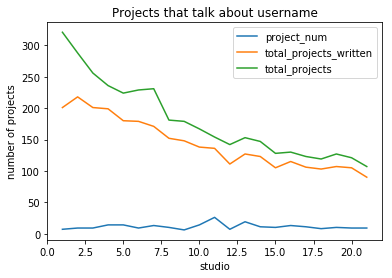

In [374]:
#x = studios
#y = number of projects in the studio that are non-zero

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# df.groupby('user_id').apply(lambda column: column.sum()/(column != 0).sum())

x = dfProjects['studio']
y1 = dfProjects['project_num']
y2 = dfProjects['total_projects_written']
y3 = dfProjects['total_projects']

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)

plt.legend()

plt.xlabel('studio')
plt.ylabel('number of projects')
plt.title('Projects that talk about username')
plt.show()

In [198]:
from textblob import TextBlob

In [219]:
lowerWriting = dfEng['writing'].str.lower()

writingNgrams = TextBlob(lowerWriting[0]).ngrams(3)


In [220]:
# Given a list of n-grams, return a dictionary of KWICs,
# indexed by keyword.
# https://programminghistorian.org/en/lessons/output-keywords-in-context-in-html-file#making-an-n-gram-dictionary

def nGramsToKWICDict(ngrams):
    keyindex = len(ngrams[0]) // 2

    kwicdict = {}

    for k in ngrams:
        if k[keyindex] not in kwicdict:
            kwicdict[k[keyindex]] = [k]
        else:
            kwicdict[k[keyindex]].append(k)
    return kwicdict

In [217]:
nGramsToKWICDict(writingNgrams)

{'is': [WordList(['animation', 'is', 'hard'])],
 'hard': [WordList(['is', 'hard', 'and'])],
 'and': [WordList(['hard', 'and', 'time']),
  WordList(['clones', 'and', 'circuits']),
  WordList(['steven', 'and', 'the'])],
 'time': [WordList(['and', 'time', 'consuming'])],
 'consuming': [WordList(['time', 'consuming', 'but'])],
 'but': [WordList(['consuming', 'but', 'after'])],
 'after': [WordList(['but', 'after', 'yesterday'])],
 'yesterday': [WordList(['after', 'yesterday', "'s"])],
 "'s": [WordList(['yesterday', "'s", 'puzzle'])],
 'puzzle': [WordList(["'s", 'puzzle', 'of'])],
 'of': [WordList(['puzzle', 'of', 'clones'])],
 'clones': [WordList(['of', 'clones', 'and']),
  WordList(['the', 'clones', 'would'])],
 'circuits': [WordList(['and', 'circuits', 'this'])],
 'this': [WordList(['circuits', 'this', 'felt'])],
 'felt': [WordList(['this', 'felt', 'a'])],
 'a': [WordList(['felt', 'a', 'little']),
  WordList(['stevens', 'a', 'song']),
  WordList(['says', 'a', 'natural'])],
 'little': [Wor

In [ ]:
nGramsToKWICDict

In [ ]:
# keywords

In [45]:
# copied from here: https://github.com/brandomr/document_cluster/blob/master/cluster_analysis_web.ipynb
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

# things to filter out
stopwords = nltk.corpus.stopwords.words('english') + list(string.punctuation)
RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
username_re = re.compile(r'@([A-Za-z0-9_]+)')
# scratch_words = ['green','click','start','flag', 'created','getting','scratch','projects','days','one',
#                 'sprite','blocks','use','\'s','https', 'project','clicks']

def text_cleaning(doc): 
    # replace return carriage with white space
    doc = doc.replace('\n', ' ')
    # remove usernames
    doc = username_re.sub(r'', doc)
    # remove numbers
    for i in range(10):
        doc = doc.replace(str(i), ' ')
    # remove stop words
    for stop_word in stopwords:
        doc = doc.replace(' ' + stop_word + ' ', ' ')
    # remove scratchwords
    for scratch_word in scratch_words:
        doc = doc.replace(' ' + scratch_word + ' ', ' ')
    # lowercase
    words = doc.split()
    doc = ' '.join([word.lower() for word in words])
    # remove single characters
    doc = [x for x in doc.split() if len(x) > 2]
    doc = " ".join(doc)
    doc = RE_EMOJI.sub(r'', doc)
    return doc

def tokenize_and_stem(text):
    text = text_cleaning(text)
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    text = text_cleaning(text)
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [46]:
#not super pythonic
#use extend so it's a big flat list of vocab
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in texts:
    allwords_stemmed = tokenize_and_stem(i) #for each item, tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [47]:
print(allwords_stemmed[:100])

['when', 'younger', 'would', 'alway', 'creat', 'stage', 'name', 'onlin', 'form', 'want', 'recreat', 'process', 'use', 'scratch', 'found', 'relat', 'simpl', 'know', 'expand', 'option', 'includ', 'input', 'immut', 'fact', 'birthday', 'hair', 'color.press', 'button', 'wait', 'hear', 'instruct', 'roy']


In [44]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')



there are 113047 items in vocab_frame


# TF-IDF v2

In [50]:
# print(texts[0:100])

print(totalvocab_stemmed[:50])

['anim', 'hard', 'and', 'time', 'consum', 'but', 'yesterday', "'s", 'puzzl', 'clone', 'circuit', 'felt', 'littl', 'manag', 'more', 'come', 'made', 'two', 'day', 'clone', 'would', 'perhap', 'differ', 'thing', 'and/or', 'i', "'d", 'separ', 'steven', 'backup', 'singer', 'press', 'watch', 'inspir', 'steven', 'steven', 'song', 'steven', 'univers', 'know', 'prompt', 'say', 'natur', 'human-mad', 'phenomenon', 'gem-mad', 'count', 'big', 'thank', 'day']


In [ ]:
def docs_by_words_df(chunks, vocabulary):
    df = pd.DataFrame(0, index=np.arange(len(chunks)), columns=vocabulary)
    
    # fill out the matrix with counts
    for i,chunk in enumerate(chunks):
        for word in chunk:
            if word in df.columns: 
                df.loc[i,word] += 1
            
    return df

# call the function and check that the resulting dataframe is correct
df = docs_by_words_df(texts, vocabulary)

# TF-IDF

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, max_features=200000,
                                 min_df=0.1, norm = 'l2', stop_words=stopwords,
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(texts) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

/Users/paulina/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CPU times: user 6.17 s, sys: 96.8 ms, total: 6.27 s
Wall time: 6.55 s
(3015, 40)


In [19]:
terms = tfidf_vectorizer.get_feature_names()
# print(terms)

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

# K-means

In [21]:
from sklearn.cluster import KMeans

num_clusters = 10

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 7.65 s, sys: 32.7 ms, total: 7.69 s
Wall time: 7.75 s


In [22]:
from sklearn.externals import joblib

joblib.dump(km,  'doc_cluster.pkl')

km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

In [23]:
dfClusterEng= dfEng[['studio', 'project_id', 'title', 'writing', 'author/id', 
        'project_author_username']]
dfClusterEng = dfClusterEng.assign(clusters = clusters)
dfClusterEng.head()


,studio,project_id,title,writing,author/id,project_author_username,clusters
0,18,237042971,Steven and the Stevens [MV],Animation is hard! And time consuming! But aft...,2745846,paulinah,1
1,18,237100206,Grumpy Bubbles,"Big thanks to @jsh for his Day 1 project, Rive...",39526,karenb,9
2,18,237093421,Raindrops,I've found that I don't always initially consi...,25705937,alirb,7
3,18,237098671,Night Rain,After simulating rain drops for today's challe...,25705937,alirb,1
4,18,237111696,Lights,This project was created for Day 19 of Getting...,56239,jsh,1


In [24]:
# len(clusters)

# dfClusterEng.info()

In [25]:
dfClusterEng['clusters'].value_counts()

7    645
5    548
4    418
8    254
3    252
9    241
0    210
1    195
6    131
2    121
Name: clusters, dtype: int64

In [26]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :10]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0], end=',')
    print() #add whitespace
    print() #add whitespace
    
#     print("Cluster %d titles:" % i, end='')
#     for title in dfEng.loc[i]['title'].values.tolist():
#         print(' %s,' % title, end='')
#     print() #add whitespace
#     print() #add whitespace
    
print()

Top terms per cluster:

Cluster 0 words: random, used, block, create, time, days, unstuck, press, play, see,

Cluster 1 words: 's, project, create, days, time, see, unstuck, code, used, challenge,

Cluster 2 words: flag, press, https, make, change, click, getting, create, work, move,

Cluster 3 words: press, space, key, make, change, create, start, getting, see, play,

Cluster 4 words: unstuck, days, unstuck, getting, getting, create, used, flag, challenge, sprites,

Cluster 5 words: play, start, move, click, see, https, project, wanted, code, create,

Cluster 6 words: add, would, like, wanted, time, game, click, project, used, see,

Cluster 7 words: time, make, used, work, would, like, try, create, getting, challenge,

Cluster 8 words: arrow, key, move, game, getting, used, make, space, change, time,

Cluster 9 words: background, change, different, used, time, create, getting, make, days, move,


